In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing the dataset

data = pd.read_csv("diabetes.csv", header=0)

## Understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


There certain fields like Blood Pressure, BMI, Skin Thickness etc which should not have 0 values. Thus, even if all the columns are not null, there are '0's in the data which may suggest missing attribute value.

In [6]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Columns like Glucose, BloodPressure, SkinThickness, Insulin and BMI should not have Zeros. So we can replace 0 with mean of the column.

In [7]:
# Replacing 0 with Nan
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose',
                      'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
# Replacing Nan with mean of the column
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

<AxesSubplot:>

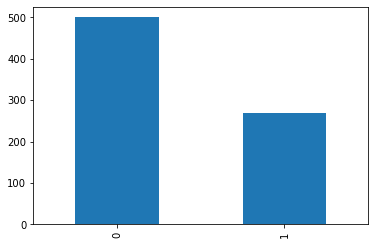

In [9]:
data['Outcome'].value_counts().plot(kind="bar")

There is imbalance in data which will affect the prediction. Thus oversampling data balancing technique can be applied.

In [10]:
#store count
outcome_count_0, outcome_count_1 = data['Outcome'].value_counts()

# Separate dataframes
outcome_0 = data[data['Outcome'] == 0]
outcome_1 = data[data['Outcome'] == 1]

<AxesSubplot:>

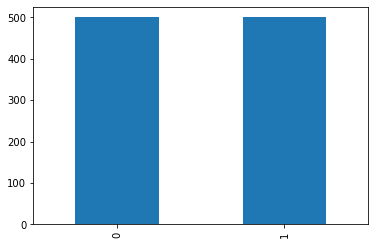

In [11]:
outcome_1_over = outcome_1.sample(outcome_count_0, replace=True)

data_over = pd.concat([outcome_1_over, outcome_0], axis=0)

data_over['Outcome'].value_counts().plot(kind='bar')

The data is now balanced.

In [12]:
# Stardarizing the data
from sklearn.preprocessing import StandardScaler
X =  pd.DataFrame(StandardScaler().fit_transform(data_over.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Y = data_over['Outcome']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


Split the data into training and testing set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,
                                                    random_state=42)

## Modeling 

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, Y_train)

predictions_log = logisticRegr.predict(X_test)

Tuning Hyperparameters

In [16]:
param_grid = [
              { 'penalty':['l1','l2','elasticnet', 'none'],
               'C':np.logspace(-4, 4, 20),
               'solver': ['lbfgs', 'newton-cg', 'liblinear'],
               'max_iter': [100,1000]
      }
]

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logisticRegr, param_grid = param_grid, verbose=False, cv=10)

best_clf = clf.fit(X_train, Y_train)

In [18]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [20]:
logisticRegr = LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

logisticRegr.fit(X_train, Y_train)

predictions_log = logisticRegr.predict(X_test)

Evaluation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Confusion Matrix

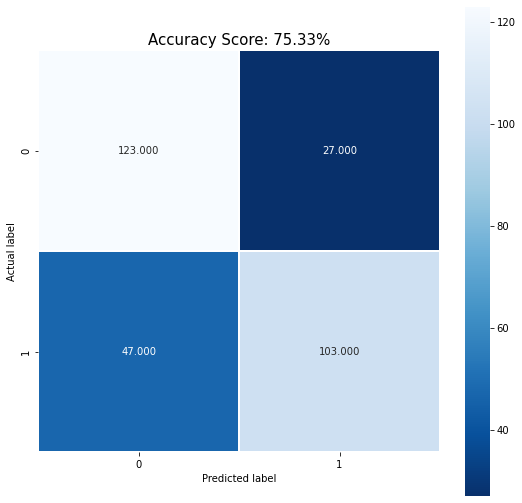

In [22]:
cm_log = metrics.confusion_matrix(Y_test, predictions_log)
score_log = logisticRegr.score(X_test, Y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm_log, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score_log*100, 2))
plt.title(all_sample_title, size = 15);

Precision & Recall

In [23]:
print('Precision: %.3f' % precision_score(Y_test, predictions_log))

Precision: 0.792


In [24]:
print('Recall: %.3f' % recall_score(Y_test, predictions_log))

Recall: 0.687


In [25]:
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)

ROC & AUC

Logistic: ROC AUC=0.839


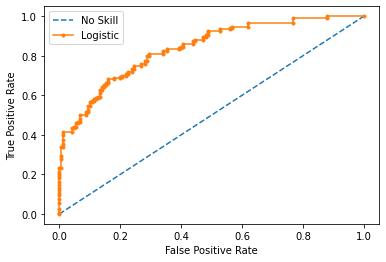

In [26]:
# predict probabilities
log_probs = logisticRegr.predict_proba(X_test)
# keep probabilities for the positive outcome only
log_probs = log_probs[:, 1]
# calculate scores
log_auc = roc_auc_score(Y_test, log_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (log_auc))
# calculate roc curves
log_fpr, log_tpr, _ = roc_curve(Y_test, log_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

predictions_rfc = rfc.predict(X_test)

Tuning Hyperparameters

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 100)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [ ]:
clf = GridSearchCV(rfc, param_grid = param_grid, verbose=False, cv=10)

best_clf = clf.fit(X_train, Y_train)

In [ ]:
best_clf.best_params_

Evaluation

Confusion Matrix

In [ ]:
cm_rfc = metrics.confusion_matrix(Y_test, predictions_rfc)
score_rfc = rfc.score(X_test, Y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm_rfc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score_rfc*100, 2))
plt.title(all_sample_title, size = 15);

Precision & Recall

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, predictions_rfc))

In [ ]:
print('Recall: %.3f' % recall_score(Y_test, predictions_rfc))

ROC & AUC

In [ ]:
# predict probabilities
rfc_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
rfc_auc = roc_auc_score(Y_test, rfc_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
rfc_fpr, rfc_tpr, _ = roc_curve(Y_test, rfc_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train, Y_train)

predictions_xgb = xgb.predict(X_test)

Evaluation

Confusion Matrix

In [ ]:
cm_xgb = metrics.confusion_matrix(Y_test, predictions_xgb)
score_xgb = xgb.score(X_test, Y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm_xgb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score_xgb*100, 2))
plt.title(all_sample_title, size = 15);

Precision & Recall

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, predictions_xgb))

In [ ]:
print('Recall: %.3f' % recall_score(Y_test, predictions_xgb))

ROC & AUC

In [ ]:
# predict probabilities
xgb_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
xgb_auc = roc_auc_score(Y_test, xgb_probs)
# summarize scores
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Interpreation: 

In case of diabetes, type II error is of more importance since false negatives are more important i.e. incorrrectly identifying the patients with diabetes as non-diabetic would be a fatal error thus model with least type II error should be selected.\
\
The confusion matrix allows us to compare the false negatives across models.\
FN - Type II error comparison\
Logistic Regression - 46/300 = 15.33%\
Random Forest - 19/300 = 6.33%\
XGBoost - 23/300 = 7.67%\
\
Thus Random Forest model has higher accuracy as well as lowest type II error.\
\
\
Precision can be explained as the number of correctly predicted diabetic patients divided by total correctly classified patients.
Recall can be explained as ratio of correctly identified diabetic patients and total actual diabetic patients.\
Thus, in case of diabetic prediction - recall is more important than precision since it talks about correctly identifying patients with diabetes than correct prediction.\
Higher the recall lower the type II error which is important in this scenario.\
Comparing Recall across models -\
Logistic Regression - 69.3%\
Random Forest - 87.3%\
XGBoost - 84.7%\
Thus, random forest outperforms other 2 models.\
\
\
ROC & AUC -\
ROC (Receiving Operator Characteristics) is the graph of True positive rate (Sensitivity/Recall) vs False Postive Rate (1-Specificity)\
(FPR - number of people incorrectly identified as diabetics divided by total people who are actually not diabetics).\
AUC is area under the ROC curve. The higher the area better the model.\
Comparing the ROC Curves

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Thus, Random Forest is a better model than Logistic & XGboost classification.